In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.datasets import make_regression

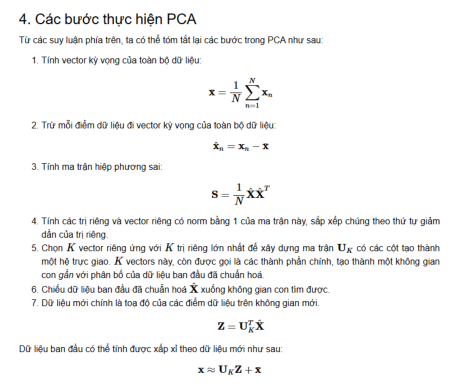

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("pca.png")
plt.imshow(image)
plt.axis('off')
plt.show()
# https://machinelearningcoban.com/2017/06/15/pca/

# Implement PCA

In [15]:
def PCA(data,k=1):
    # Calculate the mean matrix
    mean_vector = np.mean(data, axis=0)
    centered_data = data - mean_vector

    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data.T)

    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvectors based on eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Choose the top-k eigenvectors (k = number of desired components)
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Perform dimensionality reduction
    transformed_data = np.dot(data, selected_eigenvectors)
    
    return transformed_data

### Create data 3 feature and 1 label

In [16]:
X, Y = make_regression(n_samples=100, n_features=3, n_informative=3, noise=0.5)
X = X.reshape(X.shape[0], X.shape[1])

### Normalize data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X = np.array(X)

In [18]:
X.shape

(100, 3)

In [19]:
feature = ['x1','x2','x3']
df = pd.DataFrame(X,columns=feature)

In [20]:
df['Y'] = Y
df

x1        x2        x3           Y
0   0.334078  0.493235  0.461430  -12.903531
1   0.591698  0.364447  0.601939   46.408659
2   0.539964  0.549599  0.497939   43.563694
3   0.566196  0.152199  0.267272 -141.540056
4   0.153626  0.563563  0.468437  -16.939929
..       ...       ...       ...         ...
95  0.503607  0.225047  0.504087  -38.538945
96  0.561998  0.806669  0.319780   39.130886
97  0.000000  0.471209  0.947552  127.890114
98  0.358765  0.401727  0.435090  -42.729106
99  0.518245  0.569499  0.613801   91.089130

[100 rows x 4 columns]

In [21]:
X_2 = PCA(X,k=2)

### Visualization  3d

In [22]:
d1 = X_2[:, 0]
d2 = X_2[:, 1]
dy = Y

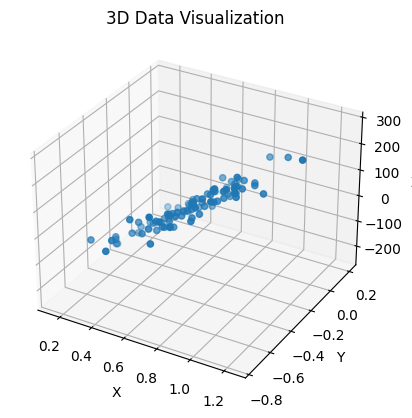

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(d1, d2, dy)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data Visualization')

plt.show()


### Perform dimensionality reduction


In [24]:
X_1 = PCA(X,k=1)

In [25]:
X_1.shape

(100, 1)

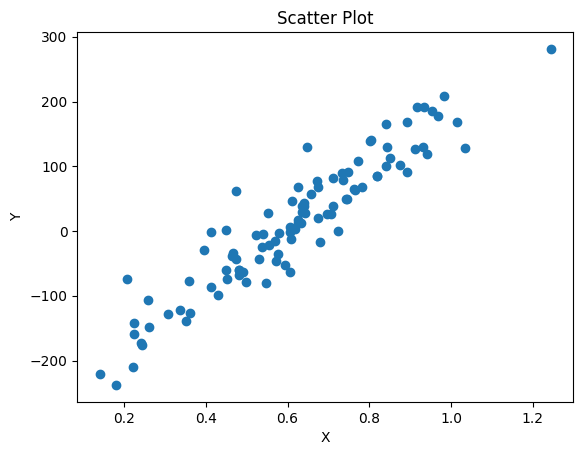

In [26]:
plt.scatter(X_1, Y)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot")

plt.show()
